## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [188]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [189]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
# Bitstamp is the Higher Price Exchange
bitstamp = pd.read_csv(
    Path("../Starter_Code/Resources/bitstamp.csv"),
    index_col='Timestamp',
    infer_datetime_format=True,
    parse_dates=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [190]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [191]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
# Coinbase is the Lower Priced Exchange
coinbase = pd.read_csv(
    Path("../Starter_Code/Resources/coinbase.csv"),
    index_col='Timestamp',
    infer_datetime_format=True,
    parse_dates=True)

In [192]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [194]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna()
bitstamp.head()
#bitstamp.dtype()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [195]:
# Use the str.replace function to remove the dollar sign, $
# Use Statement only after Object has been convert to Float64 and needs to be reverted back to string for any additional testing bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("string")
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp.head()

/Users/tannerfranklin/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [196]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [199]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
bitstamp = bitstamp.drop_duplicates()
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [200]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase.dropna()
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


In [201]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase.head()

/Users/tannerfranklin/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [202]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [203]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
coinbase = coinbase.drop_duplicates()
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [205]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp['Close'].loc['2018-01-01':'2018-03-31']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [206]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase['Close'].loc['2018-01-01':'2018-03-31']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [207]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129067.000000,129067.000000,129067.000000,129067.000000,129067.000000,1.290670e+05,129067.000000
mean,10459.993683,10472.970114,10446.214703,10459.842453,11.792878,1.177496e+05,10459.384448
std,2315.909269,2318.929342,2312.331601,2315.976088,21.799938,2.070551e+05,2315.723480
min,5945.950000,5975.060000,5920.720000,5944.000000,0.000039,3.333436e-01,5949.997212
25%,8613.985000,8621.655000,8604.440000,8613.370000,1.711874,1.773244e+04,8613.587020
50%,10145.300000,10156.410000,10131.740000,10145.950000,4.994095,5.188050e+04,10144.740411
75%,11444.455000,11453.990000,11431.970000,11444.810000,12.717950,1.313104e+05,11443.791560
max,17234.980000,17234.990000,17214.960000,17234.980000,580.646391,5.483271e+06,17227.810502


In [208]:
# Generate the summary statistics for the coinbase DataFrame
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,129322.000000,129322.000000,129322.000000,129322.000000,129322.000000,1.293220e+05,129322.000000
mean,10449.213185,10456.118514,10441.872248,10449.140958,15.666556,1.572565e+05,10448.964130
std,2317.194653,2317.710389,2316.570594,2317.197419,27.481647,2.667879e+05,2317.167139
min,5882.300000,5907.280000,5873.000000,5882.310000,0.000442,6.699174e+00,5883.394912
25%,8609.230000,8613.872500,8603.505000,8609.230000,2.999125,3.071222e+04,8609.135020
50%,10137.440000,10145.900000,10127.880000,10137.440000,7.092572,7.461366e+04,10136.035004
75%,11397.522500,11400.000000,11390.000000,11397.237500,16.954279,1.754530e+05,11396.970843
max,17178.000000,17178.000000,17177.990000,17177.990000,959.084903,1.152334e+07,17177.995495


<AxesSubplot:title={'center':'Bitstamp Close'}, xlabel='Timestamp'>

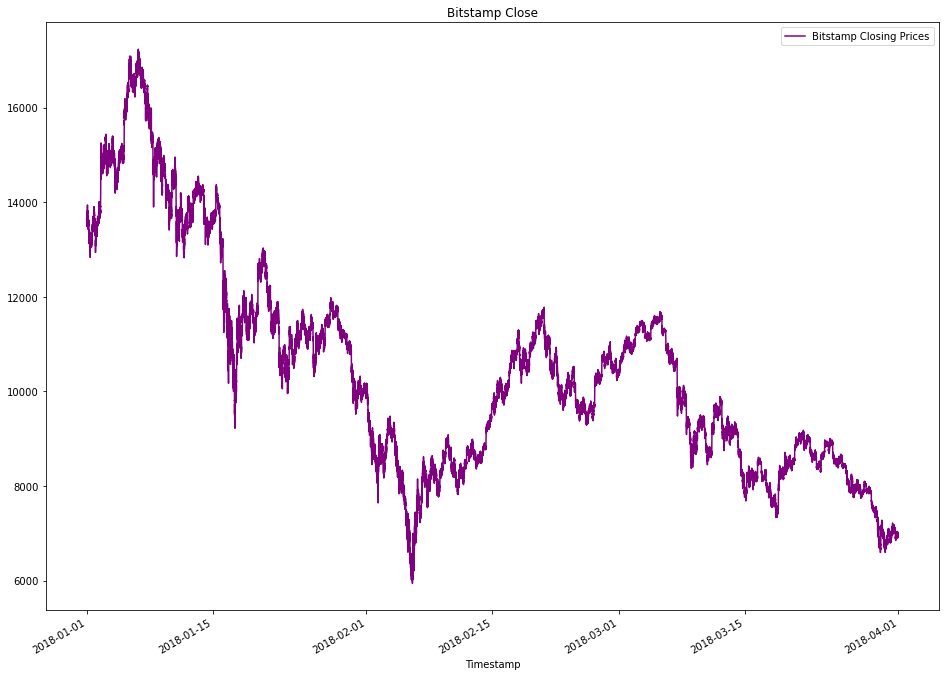

In [210]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].plot(title="Bitstamp Close", legend=True, figsize=(16, 12), color="purple", label="Bitstamp Closing Prices")

<AxesSubplot:title={'center':'Coinbase Close'}, xlabel='Timestamp'>

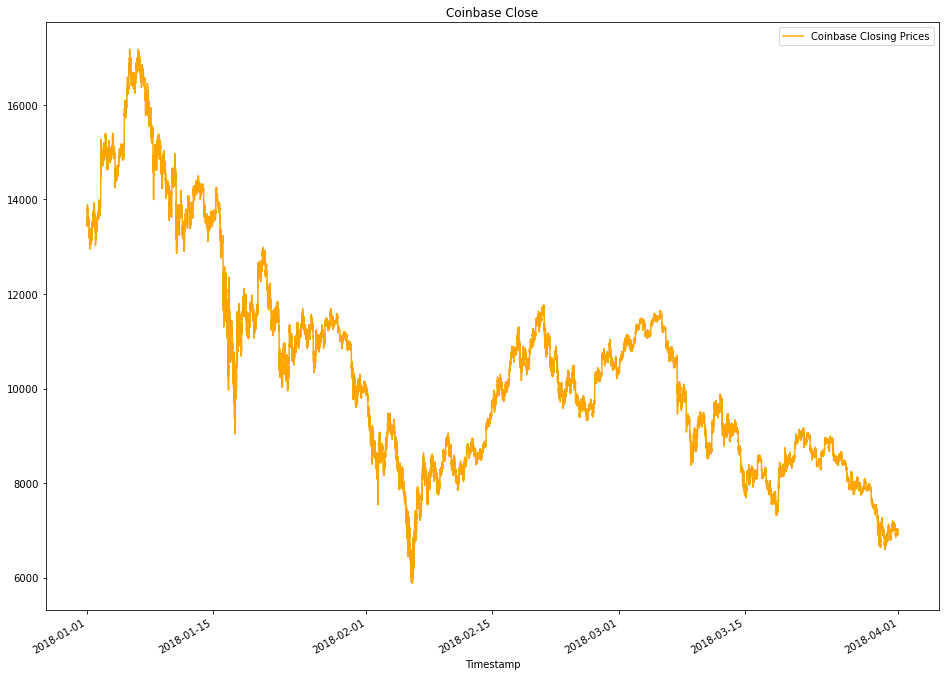

In [211]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].plot(title="Coinbase Close", legend=True, figsize=(16, 12), color="orange", label="Coinbase Closing Prices")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Close'}, xlabel='Timestamp'>

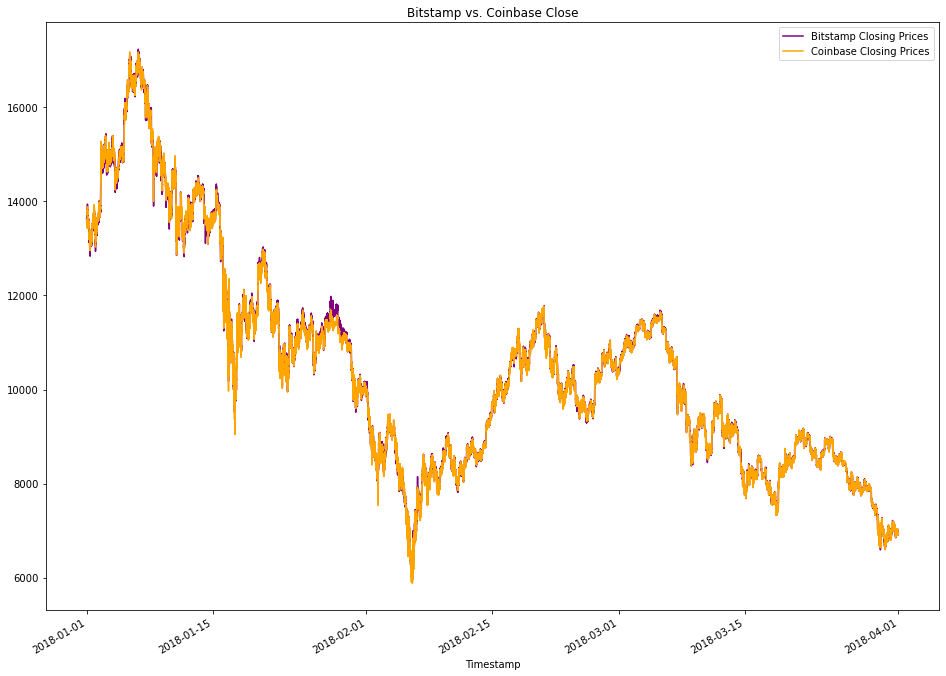

In [212]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(title="Bitstamp vs. Coinbase Close", legend=True, figsize=(16, 12), color="purple", label="Bitstamp Closing Prices")
coinbase['Close'].plot(title="Bitstamp vs. Coinbase Close", legend=True, figsize=(16, 12), color="orange", label="Coinbase Closing Prices")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Close'}, xlabel='Timestamp'>

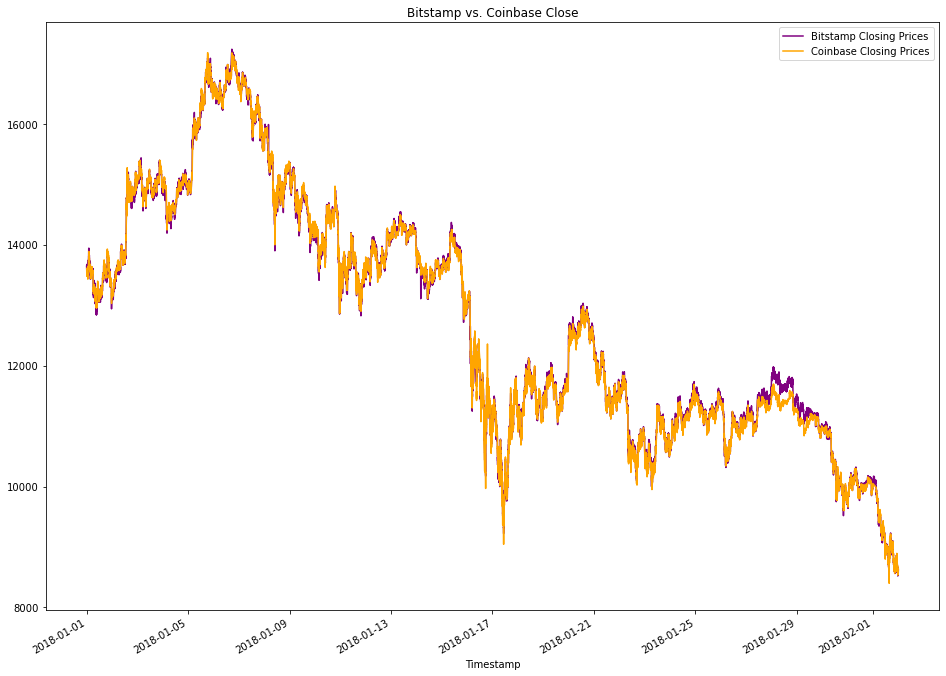

In [213]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01':'2018-02-01'].plot(title="Bitstamp vs. Coinbase Close", legend=True, figsize=(16, 12), color="purple", label="Bitstamp Closing Prices")
coinbase['Close'].loc['2018-01-01':'2018-02-01'].plot(title="Bitstamp vs. Coinbase Close", legend=True, figsize=(16, 12), color="orange", label="Coinbase Closing Prices")


<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Close'}, xlabel='Timestamp'>

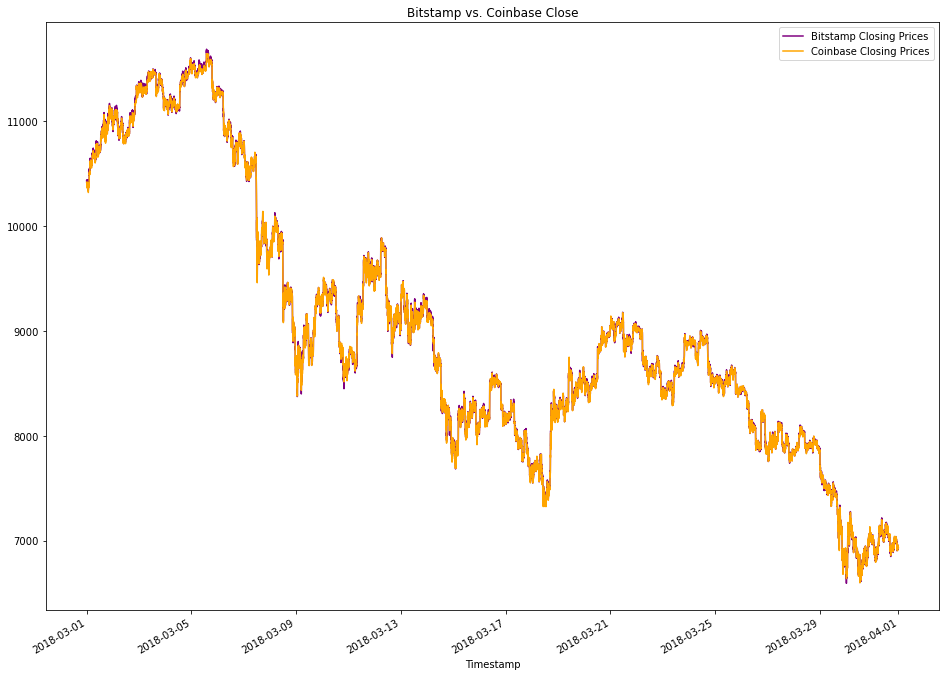

In [215]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-03-01':'2018-03-31'].plot(title="Bitstamp vs. Coinbase Close", legend=True, figsize=(16, 12), color="purple", label="Bitstamp Closing Prices")
coinbase['Close'].loc['2018-03-01':'2018-03-31'].plot(title="Bitstamp vs. Coinbase Close", legend=True, figsize=(16, 12), color="orange", label="Coinbase Closing Prices")


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** In January the spread between exchanges was much greater than the spread in March where we saw the spread narrrow as the arbitrage opportunity diminshes in the trading.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Early Bitstamp vs. Coinbase Arbitrage'}, xlabel='Timestamp'>

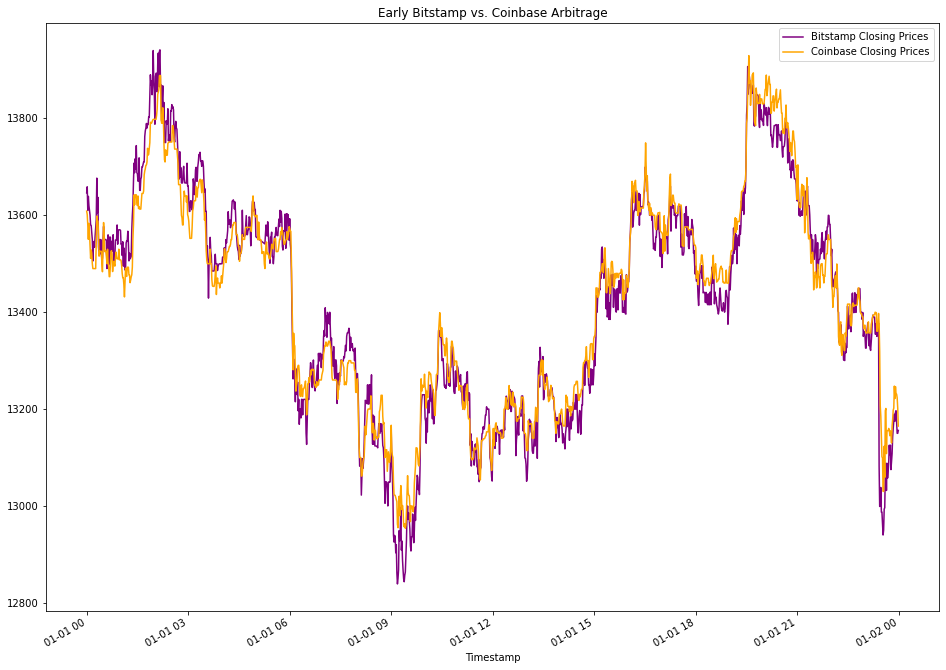

In [120]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-01'].plot(kind='line', title="Early Bitstamp vs. Coinbase Arbitrage", legend=True, figsize=(16, 12), color="purple", label="Bitstamp Closing Prices")
coinbase['Close'].loc['2018-01-01'].plot(kind='line', title="Early Bitstamp vs. Coinbase Arbitrage", legend=True, figsize=(16, 12), color="orange", label="Coinbase Closing Prices")


In [223]:
# Using the early date that you have selected, calculate the arbitrage spread 
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-01'] - coinbase['Close'].loc['2018-01-01']
arbitrage_spread_early

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean       -5.767368
std        46.214511
min      -319.990000
25%       -36.000000
50%        -5.480000
75%        26.890000
max       142.000000
Name: Close, dtype: float64

<AxesSubplot:>

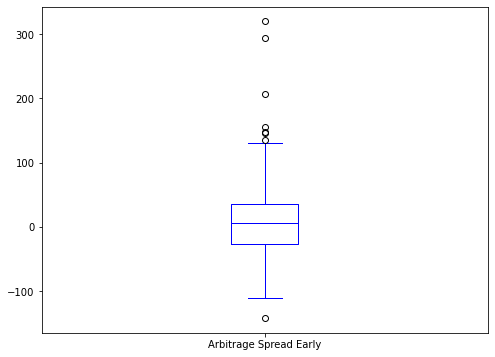

In [217]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box',legend=True, figsize=(8, 6), color="blue", label="Arbitrage Spread Early")

<AxesSubplot:title={'center':'Middle Bitstamp vs. Coinbase Arbitrage'}, xlabel='Timestamp'>

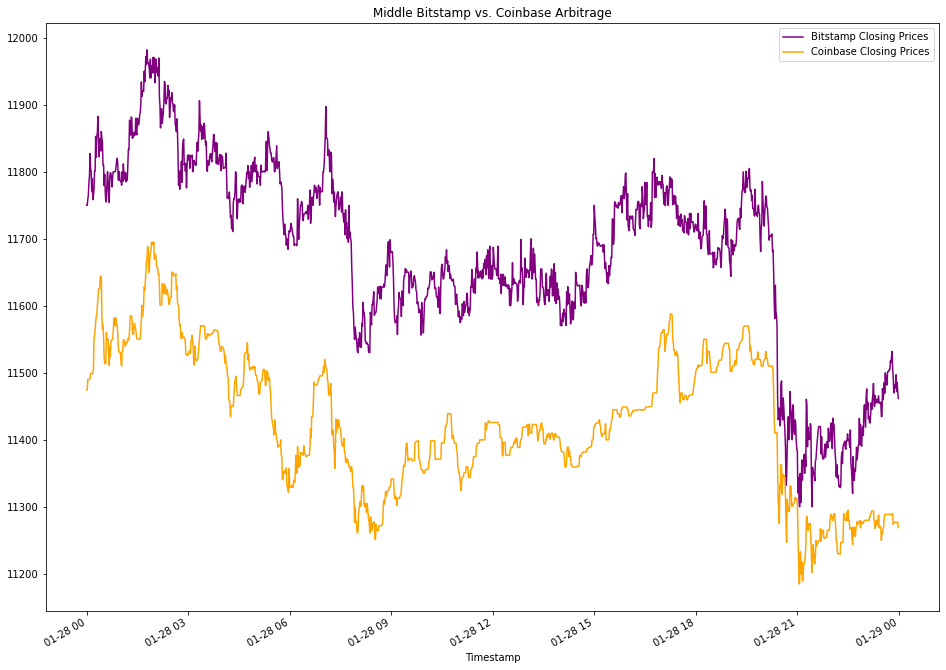

In [218]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-28'].plot(kind='line', title="Middle Bitstamp vs. Coinbase Arbitrage", legend=True, figsize=(16, 12), color="purple", label="Bitstamp Closing Prices")
coinbase['Close'].loc['2018-01-28'].plot(kind='line', title="Middle Bitstamp vs. Coinbase Arbitrage", legend=True, figsize=(16, 12), color="orange", label="Coinbase Closing Prices")


In [220]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
arbitrage_spread_middle = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']
arbitrage_spread_middle

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:>

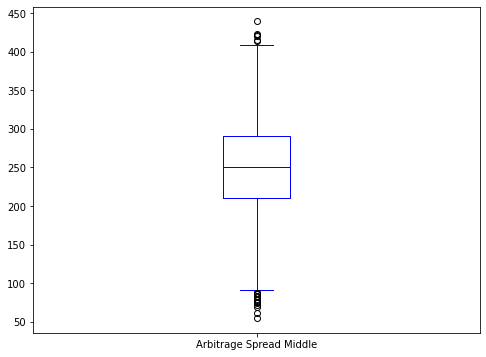

In [224]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box',legend=True, figsize=(8, 6), color="blue", label="Arbitrage Spread Middle")

<AxesSubplot:title={'center':'Late Bitstamp vs. Coinbase Arbitrage'}, xlabel='Timestamp'>

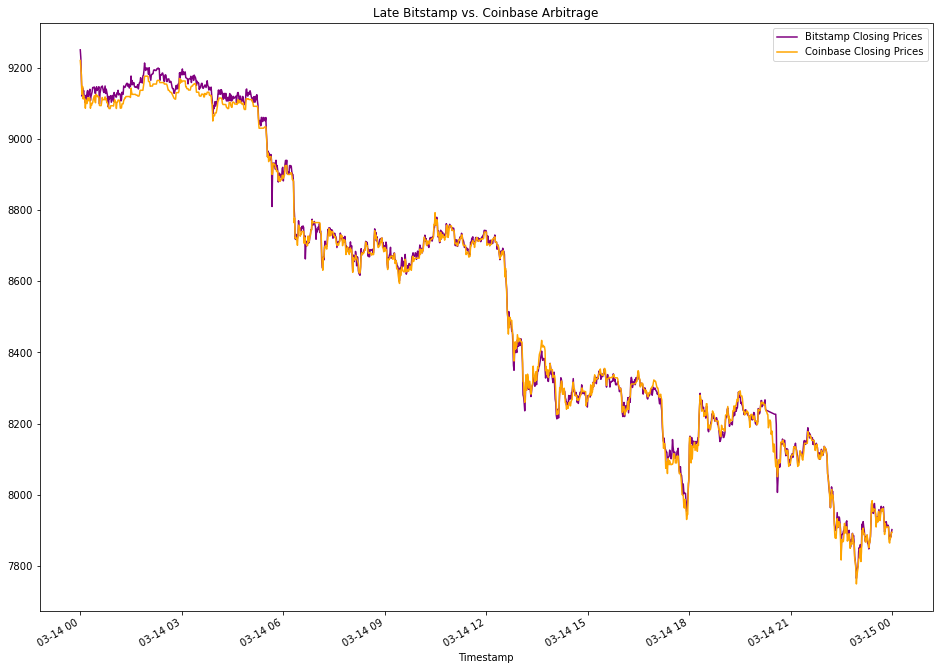

In [225]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-14'].plot(kind='line', title="Late Bitstamp vs. Coinbase Arbitrage", legend=True, figsize=(16, 12), color="purple", label="Bitstamp Closing Prices")
coinbase['Close'].loc['2018-03-14'].plot(kind='line', title="Late Bitstamp vs. Coinbase Arbitrage", legend=True, figsize=(16, 12), color="orange", label="Coinbase Closing Prices")


In [226]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-14'] - coinbase['Close'].loc['2018-03-14']
arbitrage_spread_late

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1425.000000
mean        6.731404
std        16.322187
min       -90.010000
25%        -2.910000
50%         6.000000
75%        16.600000
max       147.650000
Name: Close, dtype: float64

<AxesSubplot:>

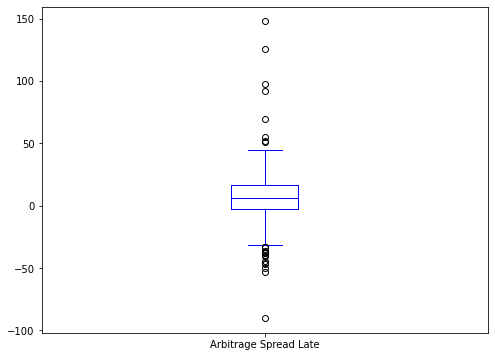

In [227]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box',legend=True, figsize=(8, 6), color="blue", label="Arbitrage Spread Late")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [228]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-01'] - coinbase['Close'].loc['2018-01-01']

#Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early > 0]
arbitrage_spread_early.describe()

count    636.000000
mean      34.664418
std       24.260997
min        0.010000
25%       14.587500
50%       30.605000
75%       51.685000
max      142.000000
Name: Close, dtype: float64

In [229]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp['Close'].loc['2018-01-28'] - coinbase['Close'].loc['2018-01-28']

#Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arbitrage_spread_middle.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [230]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-14'] - coinbase['Close'].loc['2018-03-14']

#Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late > 0]
arbitrage_spread_late.describe()

count    956.000000
mean      14.774121
std       12.422690
min        0.010000
25%        5.912500
50%       11.935000
75%       21.350000
max      147.650000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [231]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early / coinbase['Close'].loc['2018-01-01']

# Review the spread return DataFrame
spread_return_early.head()


Timestamp
2018-01-01 00:00:00    0.002792
2018-01-01 00:01:00    0.004197
2018-01-01 00:02:00    0.002225
2018-01-01 00:03:00    0.006550
2018-01-01 00:04:00    0.002692
Name: Close, dtype: float64

In [233]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle / coinbase['Close'].loc['2018-01-28']

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [234]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late / coinbase['Close'].loc['2018-03-14']

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-03-14 00:00:00    0.003254
2018-03-14 00:01:00    0.003127
2018-03-14 00:02:00         NaN
2018-03-14 00:03:00         NaN
2018-03-14 00:04:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [235]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head(5)

Timestamp
2018-01-01 01:58:00    0.010291
Name: Close, dtype: float64

In [236]:
# For the date middle in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head(5)

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [237]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head(5)

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [238]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1.000000
mean     0.010291
std           NaN
min      0.010291
25%      0.010291
50%      0.010291
75%      0.010291
max      0.010291
Name: Close, dtype: float64

In [239]:
# For the date middle in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [240]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [241]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-01']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profitable_trades_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-01 01:58:00    0.010291
Name: Close, dtype: float64

In [242]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-01-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profitable_trades_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [244]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-14']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profitable_trades_late.dropna()

# View the late profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.015508
2018-03-14 20:33:00    0.018276
2018-03-14 20:34:00    0.012002
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [245]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1.000000
mean     0.010291
std           NaN
min      0.010291
25%      0.010291
50%      0.010291
75%      0.010291
max      0.010291
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

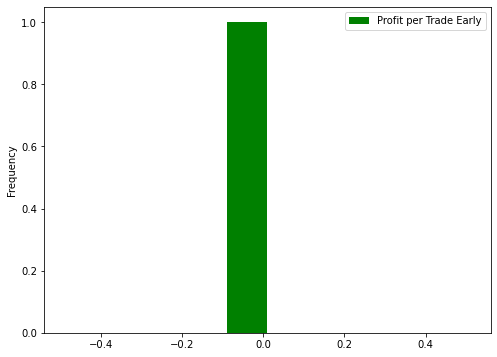

In [247]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(kind='hist',legend=True, figsize=(8, 6), color="green", label="Profit per Trade Early")

In [248]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

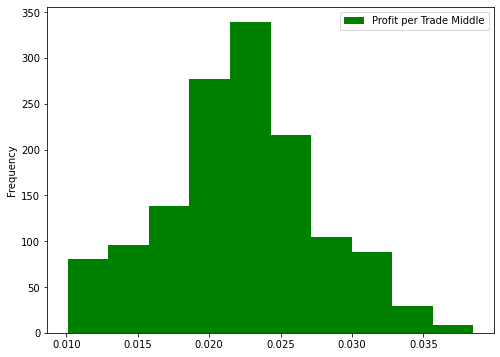

In [249]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(kind='hist',legend=True, figsize=(8, 6), color="green", label="Profit per Trade Middle")

In [250]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_late.describe()

count    4.000000
mean     0.014271
std      0.003244
min      0.011296
25%      0.011826
50%      0.013755
75%      0.016200
max      0.018276
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

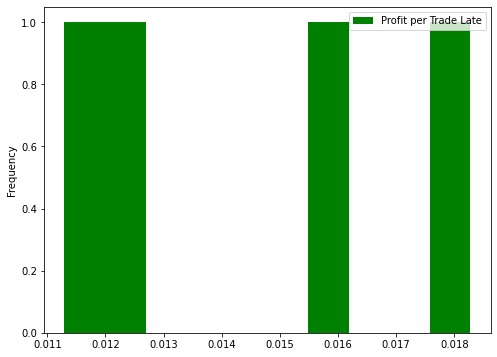

In [251]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_late.plot(kind='hist',legend=True, figsize=(8, 6), color="green", label="Profit per Trade Late")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [252]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

0.010291346571966951

In [253]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

30.592526118932792

In [281]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.057082194580561046

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [265]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-01 01:58:00    0.010291
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

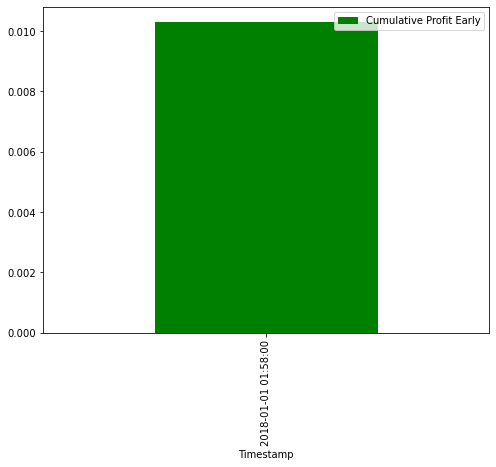

In [270]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(kind='bar',legend=True, figsize=(8, 6), color="green", label="Cumulative Profit Early")

In [271]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Timestamp
2018-01-28 00:00:00     0.023999
2018-01-28 00:01:00     0.047964
2018-01-28 00:02:00     0.071356
2018-01-28 00:03:00     0.095292
2018-01-28 00:04:00     0.120902
                         ...    
2018-01-28 23:55:00    30.522318
2018-01-28 23:56:00    30.539620
2018-01-28 23:57:00    30.558130
2018-01-28 23:58:00    30.575432
2018-01-28 23:59:00    30.592526
Name: Close, Length: 1378, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

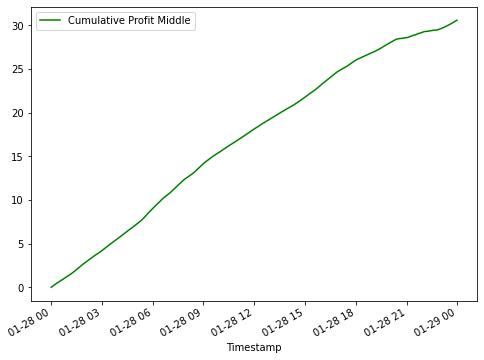

In [274]:
cumulative_profit_middle.plot(kind='line',legend=True, figsize=(8, 6), color="green", label="Cumulative Profit Middle")

In [282]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Timestamp
2018-03-14 20:31:00    0.011296
2018-03-14 20:32:00    0.026804
2018-03-14 20:33:00    0.045080
2018-03-14 20:34:00    0.057082
Name: Close, dtype: float64

<AxesSubplot:xlabel='Timestamp'>

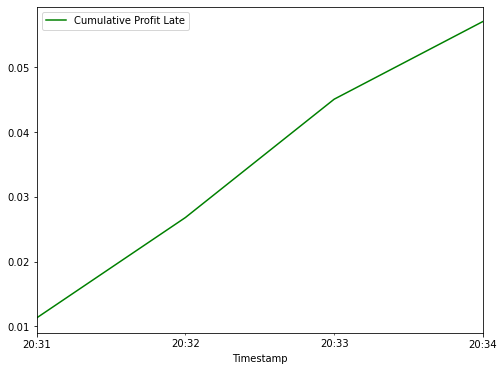

In [283]:
cumulative_profit_late.plot(kind='line',legend=True, figsize=(8, 6), color="green", label="Cumulative Profit Late")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer: Over the selected days of 1-28-2018 and 3-14-2018 we see a linear increase in the cumulative profit over the period of the day. Now as you move out to a weekly and monthly trend the arbitrage opportunities diminish over time. 

Timestamp
2018-01-28 00:00:00     0.023999
2018-01-28 00:01:00     0.047964
2018-01-28 00:02:00     0.071356
2018-01-28 00:03:00     0.095292
2018-01-28 00:04:00     0.120902
                         ...    
2018-01-28 23:55:00    30.522318
2018-01-28 23:56:00    30.539620
2018-01-28 23:57:00    30.558130
2018-01-28 23:58:00    30.575432
2018-01-28 23:59:00    30.592526
Name: Close, Length: 1378, dtype: float64

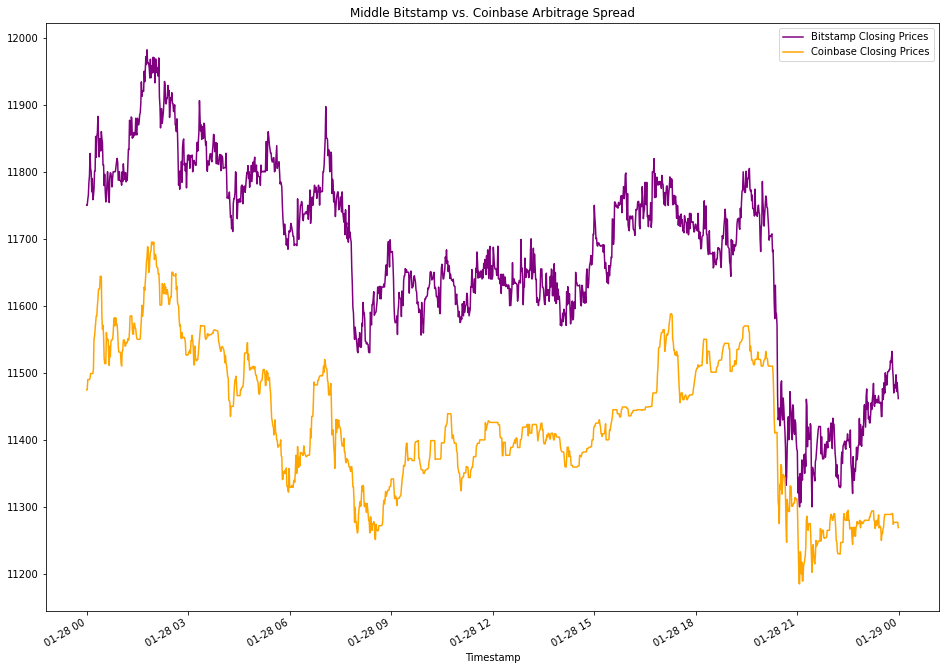

In [286]:
#Analysis Report: 
#    Upon conducting analysis of arbitrage opportunities between the Bitstamp and Coinbase Exchanges there were a several opportunities in which you
#    could profit on an arbitrage opportunity when buying on the Coinbase Exchange and selling on Bitstamp Exchange. Above their are a few dates in
#    the period of January 2018 to March 2018 that stood out as dates with excellent arbitrage opportunities. First, January 1, 2018 was analyzed as
#    having one trading opportunity that was limited, but after digging more through the arbitrage closing price graphs above for the day of January 
#    28, 2018 with the largest cumulative profit spread and March 14, 2018 with a higher frequency of lower return like January 1, 2018 there were big
#    cumulative growth return opportunities available in the mismatching asset prices. If you were to capitalize on these opportunities you would and 
#    trade between the exchanges for the entire day you would be able to have cumulative profit. This being said, outside of these small windows of 
#    trading opportunities there was little opportunities that produced any return at all and over time the arbitrage opportunities appear to regress. s

#Below was the largest Identified Spread with a great cumulative profit
bitstamp['Close'].loc['2018-01-28'].plot(kind='line', title="Middle Bitstamp vs. Coinbase Arbitrage Spread", legend=True, figsize=(16, 12), color="purple", label="Bitstamp Closing Prices")
coinbase['Close'].loc['2018-01-28'].plot(kind='line', title="Middle Bitstamp vs. Coinbase Arbitrage Spread", legend=True, figsize=(16, 12), color="orange", label="Coinbase Closing Prices")
cumulative_profit_middle

#Recommendation: To maximize this Arbitrage Opportunity I would recommend Trading from Coinbase to Bitstamp between the hours of 00:00 and 20:00
# on January 28th, 2018 for the biggest Cumulative Profit and use this model to identify other correlated opportunities in the future.
